In [ ]:
import sys
from google.colab import drive

drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/finance_course/2021/lesson1')

Mounted at /content/drive


## Introduction (cont'd)

In this first lesson we cover topics that will be useful for the rest of the course. So today we will deal with various small arguments, rather than a big one.

### Why Python 
First of all few words on why we are concentrating on $\tt{python}$. 

In short, python is widely used even when it is somehow slower than other languages
because:
* is more productive; it is a very concise and expressive language and requires little time, effort, and lines of code to perform the same operations than with other languages;
* rich set of libraries and frameworks, maintained by a large community of users.

But unfortunately not all that glitters is gold !

Python is a so called interpreted language: it takes some code (a sequence of instructions), reads and executes it. 
This is different from other programming languages like C or C++ which compile code into a language that computers can understand directly (machine language). 

![](https://drive.google.com/uc?export=view&id=1toRiHmsrBwezck3vcVHcobwC9hjaGRnE)

As a result, python is essentially an interactive programming language, which means you can program and see the results almost at the same time. This is very nice for a faster development since "compilation" time can be quite long (just to give an idea the compilation of our C++ financial code takes more than one hour). 

However there are drawbacks in term of performance, the translation to machine language has to be done in real-time resulting in slower execution times.

![](https://drive.google.com/uc?export=view&id=16xYnwD0BsFlE5ZHSz4VTVtBRq51kMOo6)

The first few Chapters of the lecture notes cover the main features and characteristics of this programming language. 


As you probably know $\tt{python}$ is available in various versions (flavours), we are going to use the 3.X. It is not mandatory to use the exact same version,
most of those available in the 3 series should be OK.


## Data Analysis

The very first step of every analysis is data collection. There are many $\tt{python}$ modules to fetch financial data, here we will use $\tt{yfinance}$ which is based on the YahooFinance database. (More details on this module in the lecture notes).

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=ef42d459fba584f6f532bef5b00041bbc26cef1d2223459990bb3b1503c9c8dc
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# load MSFT from 2020-01-01 to 2021-08-10
import yfinance as yf

proxy = yf.Ticker('MSFT')
data = proxy.history(start='2020-01-01', end='2021-09-28')

data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,156.094581,158.011598,155.652195,157.903458,22622100,0.0,0
2020-01-03,155.642403,157.244825,155.386790,155.937317,21116200,0.0,0
2020-01-06,154.423361,156.409201,153.862994,156.340378,20813700,0.0,0
2020-01-07,156.625479,156.969551,154.659304,154.914902,21634100,0.0,0
2020-01-08,156.242046,158.080430,155.278625,157.382431,27746500,0.0,0


In [ ]:
# check a specific info
proxy.info

{'52WeekChange': 0.3400513,
 'SandP52WeekChange': 0.26372707,
 'address1': 'One Microsoft Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 0,
 'askSize': 800,
 'averageDailyVolume10Day': 28087280,
 'averageVolume': 22961764,
 'averageVolume10days': 28087280,
 'beta': 0.77893,
 'beta3Year': None,
 'bid': 0,
 'bidSize': 900,
 'bookValue': 18.884,
 'category': None,
 'circulatingSupply': None,
 'city': 'Redmond',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 289.1,
 'currentRatio': 2.08,
 'dateShortInterest': 1631664000,
 'dayHigh': 289.98,
 'dayLow': 281.31,
 'debtToEquity': 57.947,
 'dividendRate': 2.48,
 'dividendYield': 0.0086,
 'earningsGrowth': 0.486,
 'earningsQuarterlyGrowth': 0.469,
 'ebitda': 80815996928,
 'ebitdaMargins': 0.48080003,
 'enterpriseToEbitda': 26.289,
 'enterpriseToRevenue': 12.64,
 'enterpriseValue': 2124577112064,
 'exDividendDate': 1637107200,
 'exchange': 'NMS',
 'e

In [ ]:
proxy.info['volume']

27421895

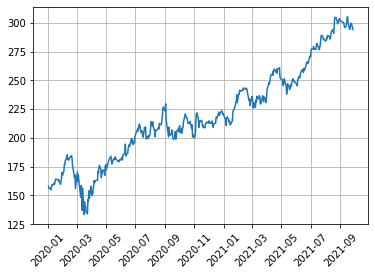

In [ ]:
from matplotlib import pyplot as plt

plt.plot(data['Close'])
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

The $\tt{history}$ method returns a $\tt{pandas}$ dataframe which then can be easily manipulated.

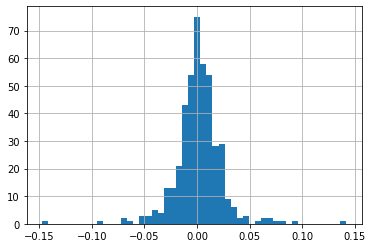

In [ ]:
data['returns'] = data['Close'].pct_change()

plt.hist(data['returns'], bins=50)
plt.grid(True)
plt.show()

Another important aspect of an analysis is data representation. In order to plot data we are going to use the $\tt{matplotlib}$ module. Below a simple example although more details are available in the notes.

In [ ]:
# check mean is coherent
data['returns'].mean()

0.0016792103374589514

In [ ]:
data['returns'].mean()*252

0.42316100503965576

A stock price is a nice example of random variable...

## Random Variable

In probability and statistics a random variable is described as a variable whose values depend on outcomes of a random phenomenon. 

For example, in the event of a coin toss, only two outcomes are possible: heads or tails. If instead the random variable is designated to represent the sum of the resulting numbers after three dice are rolled, it could be 3 (1+1+1), 18 (6+6+6), or somewhere between 3 and 18.

A random variable is required to be measurable, which allows for probabilities to be assigned to sets of its potential values.

A random variable is different from an algebraic variable. The variable in an algebraic equation is an unknown value that can be calculated. The equation $10 + x = 13$ shows that we can calculate the specific value for $x$ which is 3. On the other hand, a random variable has a set of values, and any of those values could be the resulting outcome each of them with a certain probability.

In the corporate world, random variables can be assigned to properties such as the average price of an asset over a given time period, the return on investment after a specified number of years, the estimated turnover rate at a company within the following six months, etc. Risk analysts assign random variables to risk models when they want to estimate the probability of an adverse event occurring.

When the range of possible values for $X$ is un-countably infinite then it is called a continuous random variable and its distribution can be described by a probability density function (PDF). Contrary if the range is countable, the random variable is called a discrete random variable and its distribution can be interpreted as a discrete probability distribution.

![pippo](https://drive.google.com/uc?id=1EJA8FZwmb6h5jcvhHtKMS8spLDyBQ1lk)

In [ ]:
# check norm pdf @ 0
from scipy.stats import norm

norm.pdf(0)

0.3989422804014327

The probability density function is non-negative everywhere, and its integral over the entire space is equal to 1. 

## CDF and Quantiles

The cumulative distribution function (CDF) $F$ of a random variable $X$ (with PDF $f(x)$, evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$

$$F_X(x) = Pr(X\leq x) = \int_{-\infty}^{x} f(x)dx$$

$$Pr(a \leq X\leq b) = \int_{a}^{b} f(x)dx$$

The quantile function $Q$, associated with a probability distribution of a random variable, specifies the value $x$ of the random variable such that the probability $p$ of the variable being less than or equal to that value equals the given probability. It is also called the percent-point function (PPF) or inverse cumulative distribution.

In terms of the cumulative distribution function $F$, the quantile function $Q$ returns the value $x_p$ such that

$$F_X(x_p) = P(X \leq x_p) = p$$

So the quantile function does the "inverse" of the cumulative distribution function: given a
probability $p$ (or a value of the CDF) it returns the $x$ at which the CDF reaches this probability.

![pippo](https://drive.google.com/uc?id=1YqwpRWQkBlQVY9PSZrgv07Hw7AWuUCJt)

In [ ]:
# compute quantile at 0.3 and cdf at result
from scipy.stats import norm

xp = norm.ppf(.3)
print (xp)
print (norm.cdf(xp))

-0.5244005127080409
0.29999999999999993


If instead of a distribution you have a dataset the quantile can be determined using the
function $\tt{numpy.percentile}$ (this will be useful when estimating VaR). Notice that in this case we are talking about percentile which is the quantile times 100 (e.g. 50-percentile is equivalent to the 0.5-quantile)

In [ ]:
# compute two percentiles of a list
import numpy as np

a = [1,2,3,4,5,6,7,8,9]
np.percentile(a, [5, 50])

array([1.4, 5. ])

### Expected Value

The outcomes of a random variable $X$ are connected to probabilities, hence in order to evaluate $X$ all the possibilities need to be taken into account. This is done with the \emph{expected value} which is a generalization of the weighted average, and is intuitively the arithmetic mean of a large number of independent realizations of $X$.

#### Discrete Case
Let $X$ be a random variable with a finite number of finite outcomes ($x_1, x_2, \ldots , x_k$) occurring with probabilities ($p_1, p_2, \ldots , p_k$) respectively. The expectation of $X$ is then defined as

$$\mathbb{E}[X] = \sum_{i=1}^{k} x_i p_i = x_1 p_1 + x_2 p_2 +\ldots+x_kp_k$$

As an example let $X$ represents the outcome of a roll of a fair six-sided die. The possible values for $X$ are 1, 2, 3, 4, 5, and 6, all of which are equally likely with probability 1/6.
The expectation of $X$ is then

$$\mathbb{E}[X]= 1\cdot 1/6 +2\cdot 1/6+3\cdot 1/6+4\cdot 1/6+5\cdot 1/6+6\cdot 1/6$$

In [ ]:
# compute die expectation
p = 1/6

exp=0
for x in range(1, 7):
  exp += p*x

print (exp)

3.5


### Continuous Case

If $X$ is a random variable with a probability density function of $f (x)$, then the expected value is defined as

$$\mathbb{E}[X] = \int_{\Omega} x\cdot f(x) dx$$

$\Omega$ represents the space of all the possible values taken by $x$.

As an exercise implement in $\tt{finmarkets}$ two $\tt{python}$ functions to price European call and put options using Black-Scholes formula.

$$C(S, t) = \Phi(d_1)S_t - \Phi(d_2)Ke^{-r(T-t)}$$

$$d_1 = \cfrac{1}{\sigma\sqrt{T-t}}\left[\textrm{ln}\left(\cfrac{S_t}{K}\right) + \left(r+\cfrac{\sigma^2}{2}\right)(T-t)\right]$$ 

$$d_2 = d_1 - \sigma\sqrt{T-t}$$

$$P(S_t, t) = \Phi(-d_2)Ke^{-r(T-t)} - \Phi(-d_1)S_t$$

where $\Phi$ is the cumulative distribution function of the standard normal.

In [ ]:
from finmarkets import call, put

print (call(105, 100, 0.06, 0.01, 1))
print (put(105, 100, 0.06, 0.01, 1))

6.524422859479714
0.5294062343965074


## Time Value of Money and Discounting
* Imagine a bank offering a guaranteed return of 10% on whichever amount of money is put in the account (no withdrawal allowed)
  * if I would need 11000 \$ at the end of one year, which amount of money I should invest ?

* $X$ dollars today grows in one year, at 10\%, to

\begin{equation*}
X \cdot (1 + 10\%)
\end{equation*}

* Inverting this equation the needed investment $X$ can be found as:

\begin{equation*}
X = \cfrac{11000}{(1 + 10\%)}
\end{equation*}

In [ ]:
# compute PV
X = 11000/(1.1)
print (X)

10000.0


* What about 11000 dollars two years from now ?

\begin{equation*}
X = \cfrac{11000}{\left((1 + 10\%) \cdot (1 + 10\%)\right)} =  \cfrac{11000}{(1+10\%)^ 2}
\end{equation*}

In [ ]:
# compute 2-years PV
X = 11000/1.1**2
print (X)

9090.90909090909


* Here we are *discounting* back the value of a payment that will be received in the future to bring it to its present value (PV or NPV).
  * The rate used to adjust the future payment is called the *discount rate*.
  * The idea behind discounting is also known as time value of money. 

* A positive NPV denotes that at a certain cost of capital (i.e. discount rate) the returns from an investment opportunity outweigh the costs of investment. 
  * Obviously, when comparing various alternative investments, the option with the most positive NPV or least negative NPV will be favoured or chosen. 

#### Example 

* You have the chance to invest in a project, that will pay 100 \\$ in year 1, and 200 \$ in year 2. 
  * How much are you willing to pay for this opportunity  (assume an annual discount rate of 10\%) ?

* The answer to the question is that you will be willing to pay at most an amount that is equal to the PV of this stream of payments. 
* To calculate the present value, you need to divide the payment by its respective discount factors ($D_n$ discount factor for year $n$).

\begin{equation}
D_n = \cfrac{1}{(1 + r)^n}
\end{equation}

In [ ]:
# compute discount factors and PV
c1 = 1 / (1+0.1)*100
c2 = 1 / (1+0.1)**2 * 200

print (c1+c2)

256.198347107438


* Hence, you would be willing to pay 256.2 dollars for this opportunity.

## Datetime

* We will heavily use `datetime` module, dedicated to date and time in `python`.
  * In addition we rely on `dateutil.relativedelta` to perform operations on dates;
  * dedicated Section in the notes on this important module.

In [ ]:
# couple of tests of datetime
from datetime import date
from dateutil.relativedelta import relativedelta

d = date.today()
print (d)

d1 = date(2022, 12, 25)
print (d1)

print ((d1 - d).days)

print (d1.strftime('%d/%m/%Y'))

print (d1.weekday())

print (d + relativedelta(days=45))

print (d + relativedelta(months=45))

2021-10-04
2022-12-25
447
25/12/2022
6
2021-11-18
2025-07-04


### Payment Dates Generator

* Since we will need to create many lists of dates (e.g. payment dates) let's develop a $\tt{python}$ utility that does that for us. 

* The function takes as input a starting date (the first date of the list), and a maturity (in months) which represents the length of the list. 
* The tenor for the moment will be 12 months by default.

* Notice that if the maturity is not a multiple of 12 months the last period will be truncated to the last date.

In [ ]:
# generate_dates
from datetime import date
from dateutil.relativedelta import relativedelta

def generate_dates(start_date, maturity_months):
  dates = []
  for d in range(0, maturity_months, 12):
    dates.append(start_date + relativedelta(months=d))
  dates.append(start_date + relativedelta(months=maturity_months))
  return dates


In [ ]:
# test the function
print (generate_dates(date.today(), 25))

[datetime.date(2021, 10, 4), datetime.date(2022, 10, 4), datetime.date(2023, 10, 4), datetime.date(2023, 11, 4)]


**Add $\tt{generate\_dates}$ to finmarkets library.**

## Bond

* A bond is an instrument that represents a loan made by an investor to a borrower. 
  * Bonds are used by companies, municipalities, states, and sovereign governments to finance projects and operations.

* Owners of bonds are *debt-holders*, or creditors of the *issuer*. 

* Bond details include 
  * the principal, i.e. the amount of the loan;
  * the end date (when the principal is due to be paid to the bond owner);
  * the terms for variable or fixed interest payments made by the borrower.
    * The *coupon* is the interest rate that the issuer pays to the holder. 
    * This rate can be fixed throughout the life of the bond but it can also vary with a money market index, such as EURIBOR, or it can be even more exotic.

* **The value of a bond can be computed as the discounted value of future cash flows generated by the bond itself.**

#### Example

* Consider a 3-years bond with a face value of 100 EUR providing fixed coupons at a 6% rate annually. 
* Assume also that the discount rates are 5.0% 5.8% and 6.4% for 1, 2, 3 year maturities. 
* To compute the present value of the first coupon we need to discount it at 5.0% for 1 year, for the second the discount has to be at 5.8% and so on. 

In [ ]:
# compute bond price

def bond_value(N, C, r, maturity):
  value = 0
  for t in range(1, maturity+1):
    value += N*C*1/(1+r[t])**t
  value += N*1/(1+r[t])**t
  return value

maturity = 3
N = 100
C = 0.06
rates = {1:0.05, 2:0.058, 3:0.064}
print ("{:.2f}".format(bond_value(N, C, rates, maturity)))

99.07


### Yield to Maturity

* The *yield to maturity* of a bond is the interest rate that makes the present value of the future coupon payments equal to the current bond price.
* For a known price $P_0$, the yield is the solution $y$ of the equation

\begin{equation}
P_0 = \sum_{t=1}^T e^{-yt}C + e^{-yT}F 
\end{equation}
* where $C$ is the coupon end $F$ the nominal.

* Finding the yield to maturity is equivalent to find the zeros of the previous function. 
  * To find the zeros of a function $f(x)$ means to find the values of $\hat{x}$ for which $f(\hat{x})=0$:

\begin{equation}
\sum_{t=1}^T e^{-yt}C + e^{-yT}F - P_0 = 0 
\end{equation}

* There are various methods to solve this problem (which is also called root-finding), the simplest being the *bisection method*.

![](https://drive.google.com/uc?id=1Zt18h9fRo65Er5V9iJBdOpX4trcytLSW)

* In $\tt{python}$ this algorithm is implemented in $\tt{scipy.optimize.bisect}$.

In [ ]:
# write ytom and use bisect
from scipy.optimize import bisect
from datetime import date

def ytom(y, N, C, maturity, P0):
  val = 0
  for i in range(1, maturity+1):
    val += N*C*1/(1+y)**i
  val += N*1/(1+y)**i - P0
  return val

maturity = 3
N = 100
P0 = 105
C = 0.05

root = bisect(ytom, -0.5, 1, args=(N, C, maturity, P0))
print ("{:.11f}".format(root))

0.03224706143


* An interesting alternative is the $\tt{Brent}$ method available in $\tt{scipy.optimize.brentq}$.

In [ ]:
# do the same for brentq
from scipy.optimize import brentq

root = brentq(ytom, -0.5, 1, args=(N, C, maturity, P0))
print ("{:.11f}".format(root))

0.03224706143


* If I ask you: "how is the bond price changing with the yield to maturity ?"
  * What would be the simplest way to check ? 

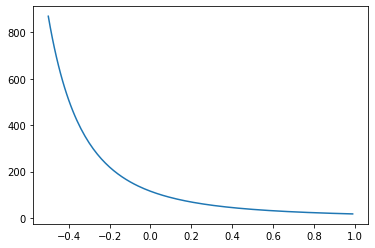

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(-0.5, 1, 0.01)
y = []
for i in x:
  y.append(ytom(i, N, C, maturity, 0))

plt.plot(x, y)
plt.show()